<a href="https://colab.research.google.com/github/rulocastellanos/practice_data_science_ml/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on https://www.youtube.com/watch?v=Wqmtf9SA_kk

Data https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna(inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1 )
y = data['median_house_value']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
38,-122.26,37.83,52.0,1470.0,330.0,689.0,309.0,3.4800,NEAR BAY,191400.0
8536,-118.35,33.89,30.0,1143.0,299.0,776.0,273.0,4.2829,<1H OCEAN,240000.0
14151,-117.07,32.78,22.0,922.0,240.0,1524.0,235.0,1.6815,NEAR OCEAN,218800.0
17435,-120.46,34.64,37.0,1697.0,334.0,740.0,272.0,2.3804,NEAR OCEAN,148000.0
10589,-117.77,33.69,16.0,1666.0,341.0,479.0,336.0,2.1406,<1H OCEAN,55000.0
...,...,...,...,...,...,...,...,...,...,...
7791,-118.07,33.89,35.0,1145.0,274.0,1651.0,265.0,3.1250,<1H OCEAN,120300.0
2283,-119.76,36.79,26.0,3654.0,837.0,1976.0,830.0,2.1544,INLAND,72800.0
8889,-118.50,34.03,32.0,6365.0,1784.0,2767.0,1698.0,3.6451,<1H OCEAN,383300.0
5168,-118.27,33.95,35.0,2073.0,494.0,1753.0,490.0,1.5000,<1H OCEAN,93600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

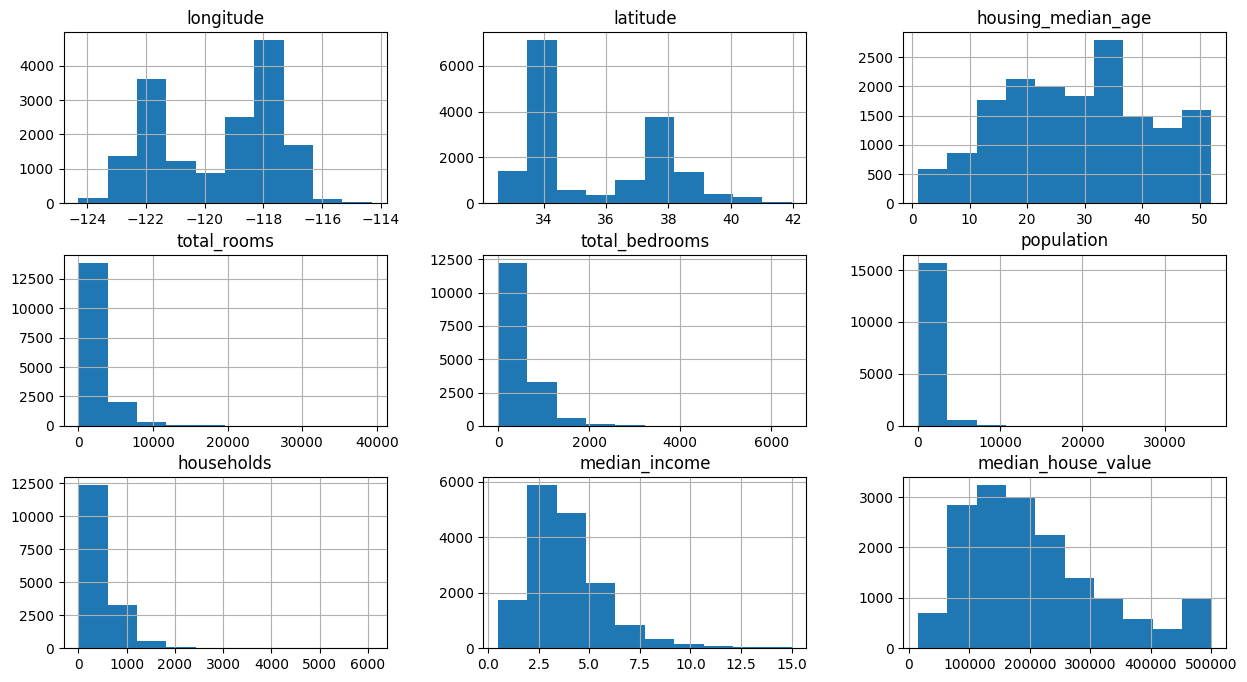

In [15]:
train_data.hist(figsize=(15,8))

<Axes: >

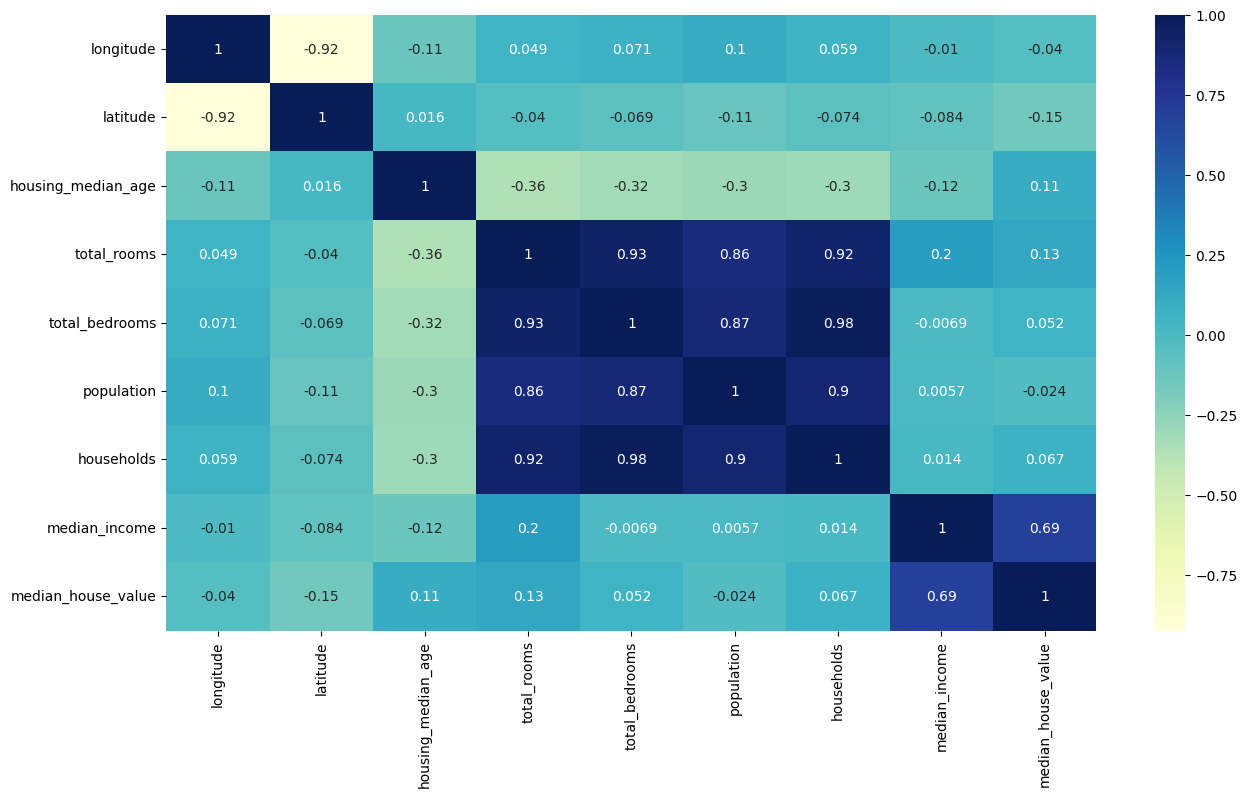

In [19]:
numeric_data = train_data.select_dtypes(include=[np.number])
plt.figure(figsize= (15,8))
sns.heatmap ( numeric_data.corr(), annot = True, cmap = 'YlGnBu')

In [20]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+ 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+ 1)
train_data['population'] = np.log(train_data['population']+ 1)
train_data['households'] = np.log(train_data['households']+ 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

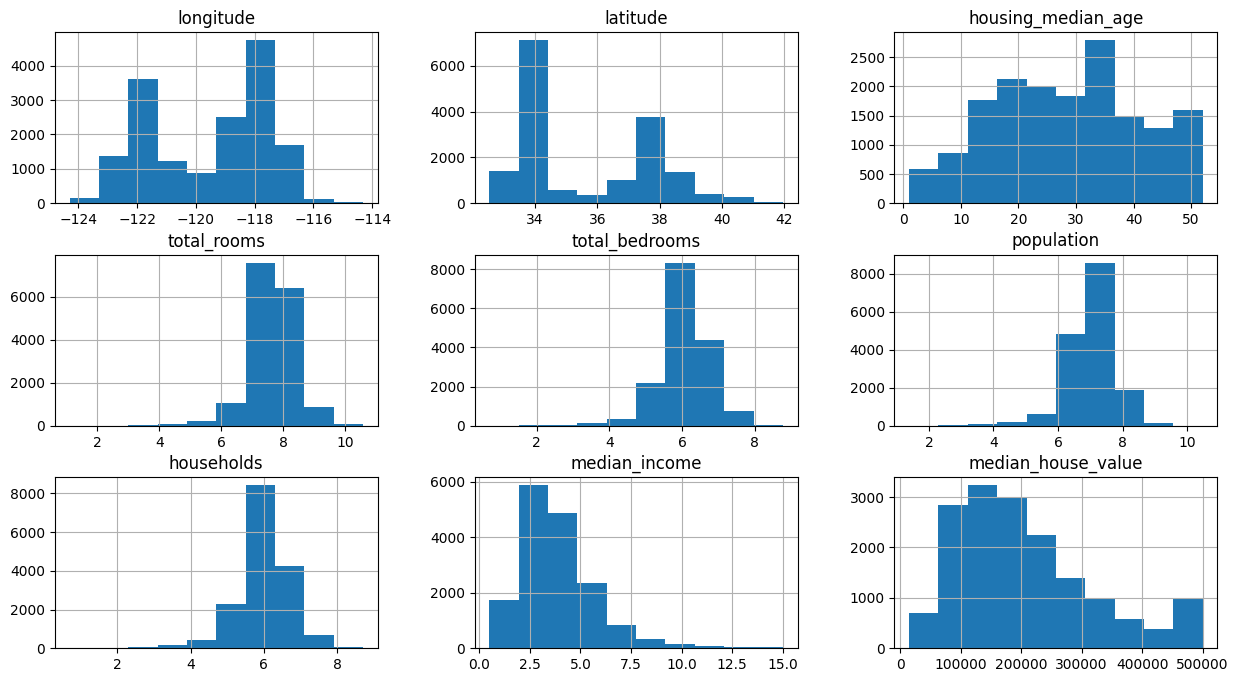

In [21]:
train_data.hist(figsize=(15,8))

In [22]:
#transform ocean proximity by creating new columns

train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7194
INLAND,5189
NEAR OCEAN,2120
NEAR BAY,1839
ISLAND,4


In [28]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
38,-122.26,37.83,52.0,7.293698,5.802118,6.536692,5.736572,3.4800,NEAR BAY,191400.0,False,False,False,True,False
8536,-118.35,33.89,30.0,7.042286,5.703782,6.655440,5.613128,4.2829,<1H OCEAN,240000.0,True,False,False,False,False
14151,-117.07,32.78,22.0,6.827629,5.484797,7.329750,5.463832,1.6815,NEAR OCEAN,218800.0,False,False,False,False,True
17435,-120.46,34.64,37.0,7.437206,5.814131,6.608001,5.609472,2.3804,NEAR OCEAN,148000.0,False,False,False,False,True
10589,-117.77,33.69,16.0,7.418781,5.834811,6.173786,5.820083,2.1406,<1H OCEAN,55000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,-118.07,33.89,35.0,7.044033,5.616771,7.409742,5.583496,3.1250,<1H OCEAN,120300.0,True,False,False,False,False
2283,-119.76,36.79,26.0,8.203851,6.731018,7.589336,6.722630,2.1544,INLAND,72800.0,False,True,False,False,False
8889,-118.50,34.03,32.0,8.758727,7.487174,7.925880,7.437795,3.6451,<1H OCEAN,383300.0,True,False,False,False,False
5168,-118.27,33.95,35.0,7.637234,6.204558,7.469654,6.196444,1.5000,<1H OCEAN,93600.0,True,False,False,False,False


In [31]:
train_data = train_data.drop('ocean_proximity', axis=1)

KeyError: "['ocean_proximity'] not found in axis"

In [32]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
38,-122.26,37.83,52.0,7.293698,5.802118,6.536692,5.736572,3.4800,191400.0,False,False,False,True,False
8536,-118.35,33.89,30.0,7.042286,5.703782,6.655440,5.613128,4.2829,240000.0,True,False,False,False,False
14151,-117.07,32.78,22.0,6.827629,5.484797,7.329750,5.463832,1.6815,218800.0,False,False,False,False,True
17435,-120.46,34.64,37.0,7.437206,5.814131,6.608001,5.609472,2.3804,148000.0,False,False,False,False,True
10589,-117.77,33.69,16.0,7.418781,5.834811,6.173786,5.820083,2.1406,55000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,-118.07,33.89,35.0,7.044033,5.616771,7.409742,5.583496,3.1250,120300.0,True,False,False,False,False
2283,-119.76,36.79,26.0,8.203851,6.731018,7.589336,6.722630,2.1544,72800.0,False,True,False,False,False
8889,-118.50,34.03,32.0,8.758727,7.487174,7.925880,7.437795,3.6451,383300.0,True,False,False,False,False
5168,-118.27,33.95,35.0,7.637234,6.204558,7.469654,6.196444,1.5000,93600.0,True,False,False,False,False


<Axes: >

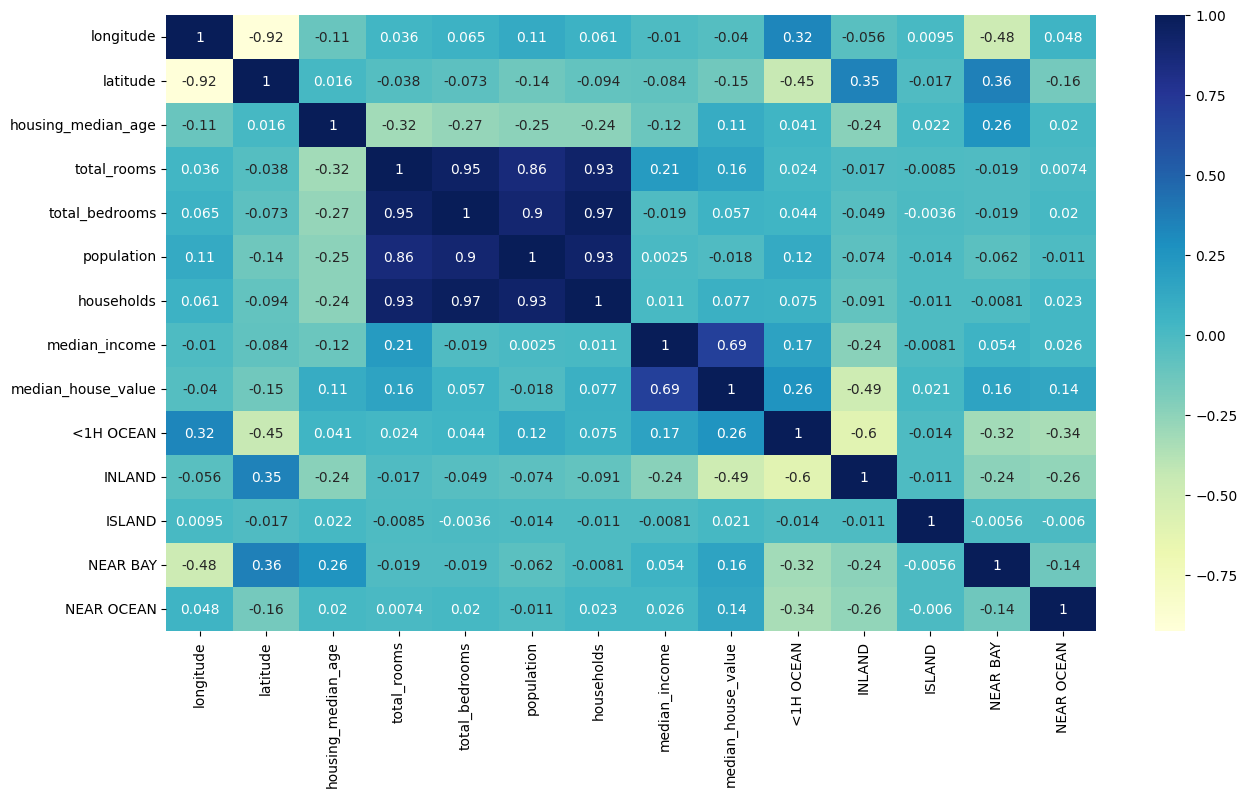

In [34]:
numeric_and_boolean_data = train_data.select_dtypes(include=[np.number, 'bool'])
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_and_boolean_data.corr(), annot=True, cmap='YlGnBu')

In [37]:
train_data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']] = train_data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']].astype(int)

<Axes: xlabel='latitude', ylabel='longitude'>

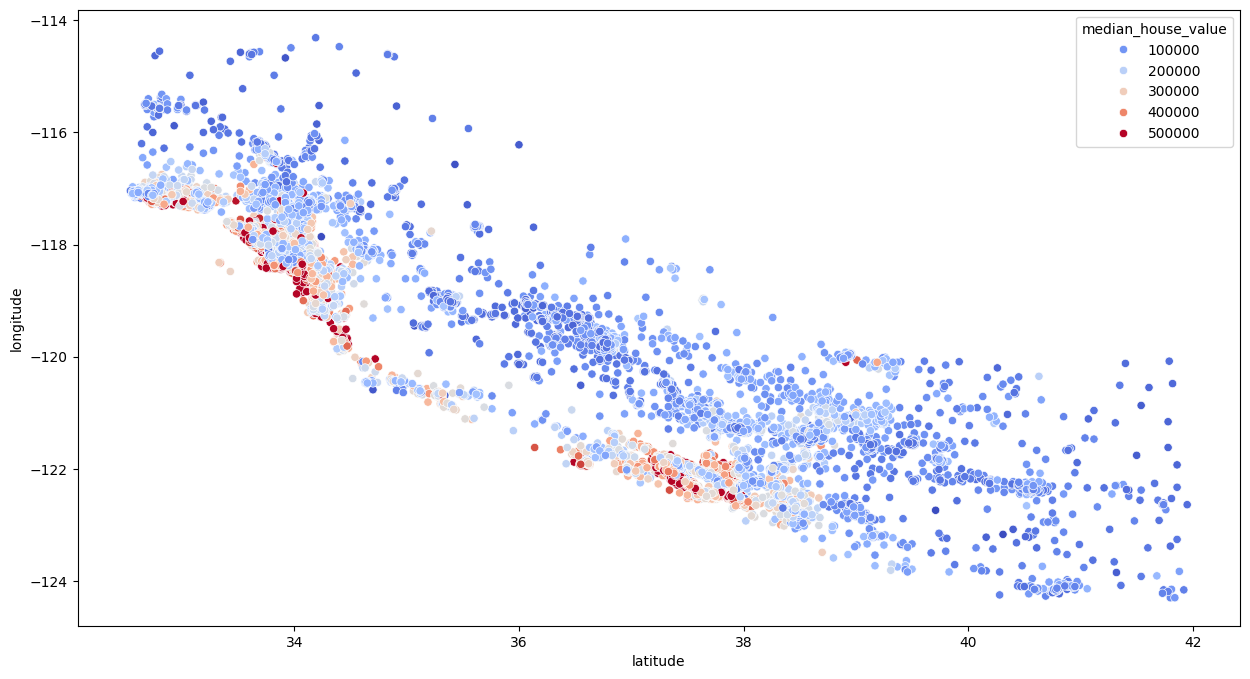

In [41]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x= 'latitude', y = 'longitude', data = train_data,
                hue = 'median_house_value',
                palette = 'coolwarm'
                )

In [43]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

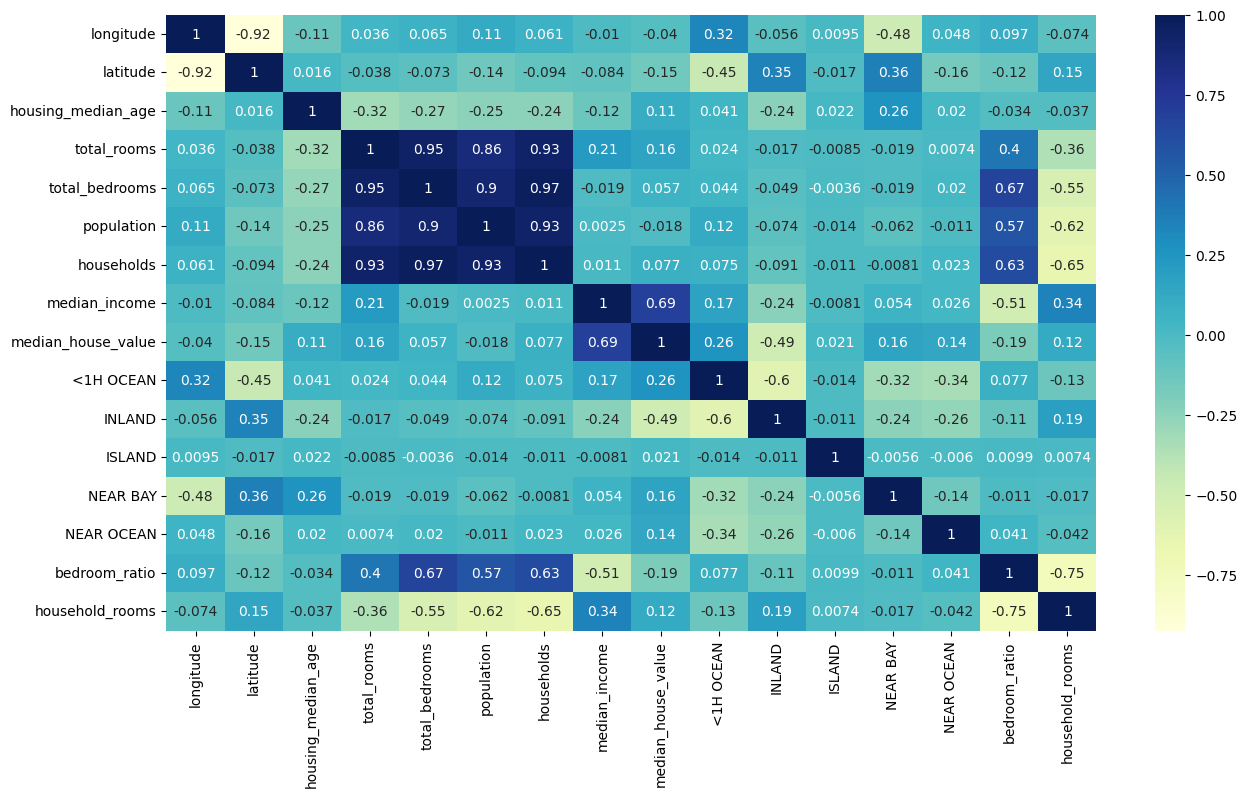

In [44]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)


reg = LinearRegression()

reg.fit(X_train_s, y_train)


LinearRegression()

In [46]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+ 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+ 1)
test_data['population'] = np.log(test_data['population']+ 1)
test_data['households'] = np.log(test_data['households']+ 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [47]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14260,-117.12,32.70,14.0,6.709304,5.472271,6.719013,5.472271,1.3194,90500.0,False,False,False,False,True,0.815624,1.226055
4789,-118.32,34.02,47.0,7.407924,5.849325,7.021976,5.826000,2.0042,114200.0,True,False,False,False,False,0.789604,1.271528
15997,-122.47,37.75,51.0,7.906179,5.983936,6.994850,5.996452,9.3603,500001.0,False,False,False,True,False,0.756868,1.318476
10561,-117.71,33.62,22.0,7.832411,5.961005,7.199678,5.971262,5.8898,242800.0,True,False,False,False,False,0.761069,1.311684
19735,-121.80,40.34,26.0,8.479699,6.814543,7.201916,6.291569,2.8810,79800.0,False,True,False,False,False,0.803630,1.347788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,-117.69,34.08,30.0,8.356085,6.651572,7.663877,6.594413,4.5185,142500.0,False,True,False,False,False,0.796015,1.267146
371,-122.15,37.74,41.0,6.753438,5.187386,6.349139,5.257495,3.1458,130600.0,False,False,False,True,False,0.768110,1.284535
1098,-121.74,39.59,24.0,7.336937,5.634790,6.588926,5.609472,2.3833,95100.0,False,True,False,False,False,0.768003,1.307955
11287,-117.95,33.80,34.0,7.411556,5.655992,6.809039,5.680173,4.6389,214600.0,True,False,False,False,False,0.763131,1.304812


In [48]:
test_data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']] = test_data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']].astype(int)

In [49]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14260,-117.12,32.70,14.0,6.709304,5.472271,6.719013,5.472271,1.3194,90500.0,0,0,0,0,1,0.815624,1.226055
4789,-118.32,34.02,47.0,7.407924,5.849325,7.021976,5.826000,2.0042,114200.0,1,0,0,0,0,0.789604,1.271528
15997,-122.47,37.75,51.0,7.906179,5.983936,6.994850,5.996452,9.3603,500001.0,0,0,0,1,0,0.756868,1.318476
10561,-117.71,33.62,22.0,7.832411,5.961005,7.199678,5.971262,5.8898,242800.0,1,0,0,0,0,0.761069,1.311684
19735,-121.80,40.34,26.0,8.479699,6.814543,7.201916,6.291569,2.8810,79800.0,0,1,0,0,0,0.803630,1.347788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,-117.69,34.08,30.0,8.356085,6.651572,7.663877,6.594413,4.5185,142500.0,0,1,0,0,0,0.796015,1.267146
371,-122.15,37.74,41.0,6.753438,5.187386,6.349139,5.257495,3.1458,130600.0,0,0,0,1,0,0.768110,1.284535
1098,-121.74,39.59,24.0,7.336937,5.634790,6.588926,5.609472,2.3833,95100.0,0,1,0,0,0,0.768003,1.307955
11287,-117.95,33.80,34.0,7.411556,5.655992,6.809039,5.680173,4.6389,214600.0,1,0,0,0,0,0.763131,1.304812


In [50]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [56]:
X_test_s = scaler.transform(X_test)

In [51]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14260,-117.12,32.70,14.0,6.709304,5.472271,6.719013,5.472271,1.3194,0,0,0,0,1,0.815624,1.226055
4789,-118.32,34.02,47.0,7.407924,5.849325,7.021976,5.826000,2.0042,1,0,0,0,0,0.789604,1.271528
15997,-122.47,37.75,51.0,7.906179,5.983936,6.994850,5.996452,9.3603,0,0,0,1,0,0.756868,1.318476
10561,-117.71,33.62,22.0,7.832411,5.961005,7.199678,5.971262,5.8898,1,0,0,0,0,0.761069,1.311684
19735,-121.80,40.34,26.0,8.479699,6.814543,7.201916,6.291569,2.8810,0,1,0,0,0,0.803630,1.347788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,-117.69,34.08,30.0,8.356085,6.651572,7.663877,6.594413,4.5185,0,1,0,0,0,0.796015,1.267146
371,-122.15,37.74,41.0,6.753438,5.187386,6.349139,5.257495,3.1458,0,0,0,1,0,0.768110,1.284535
1098,-121.74,39.59,24.0,7.336937,5.634790,6.588926,5.609472,2.3833,0,1,0,0,0,0.768003,1.307955
11287,-117.95,33.80,34.0,7.411556,5.655992,6.809039,5.680173,4.6389,1,0,0,0,0,0.763131,1.304812


In [52]:
#Linear regression score
reg.score(X_test, y_test)

0.6683383436795756

In [57]:
reg.score(X_test_s, y_test)

0.6683383436795756

In [60]:
#Now trying Random Forest

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [61]:
forest.score(X_test_s, y_test)

0.8041235433607367

In [ ]:
pipin

In [ ]:
#Now trying with a parameter
#Grid search with cross validation

from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators' : [100, 200, 300],
    'min_samples_split' : [2, 4],
    'max_depth' : [None, 4, 8],
}

grid_search = GridSearchCV(forest,
                           param_grid,
                           cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score= True )

grid_search.fit(X_train_s, y_train)

In [64]:
best_forest = grid_search.best_estimator_

In [65]:
best_forest.score(X_test_s, y_test)

0.8050985564242483